In [14]:
import pandas as pd
import torch
from torch.nn.functional import mse_loss, relu
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import wilcoxon
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
colunas_av = ['user_id', 'filme_id', 'rating', 'timestamp']
avaliacao = pd.read_csv('./movielens/u.data', sep='\t', names=colunas_av)
avaliacao.head(20)

,user_id,filme_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [3]:
user = pd.read_csv('./movielens/u.user', sep='|', header = None)
colunas_user = ['user_id', 'idade', 'sexo', 'profissao', 'cep']
user.columns = colunas_user
user.drop(columns = ['cep'], inplace = True)
user.head()

,user_id,idade,sexo,profissao
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [4]:
valores_unicos = user['profissao'].unique()
genero = pd.read_csv('./movielens/u.genre', sep='|', header = None)
colunas_genero = ['genero', 'id_genero']
genero.columns = colunas_genero
genero.head(19)

,genero,id_genero
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [5]:
filmes = pd.read_csv('./movielens/u.item', sep='|', encoding='ISO-8859-1', header = None)
colunas_filme = ['filme_id', 'nome_filme','lancamento' ,'3', 'url_filme', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
filmes.columns = colunas_filme
filmes.drop (columns = ['3', 'url_filme'], inplace = True)
filmes.head(20)

,filme_id,nome_filme,lancamento,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
avaliacao.drop(columns= 'timestamp', inplace=True)
avaliacao.head()
df = avaliacao.pivot(index='user_id', columns = 'filme_id', values='rating')

df = df.fillna(0)
df.head()

filme_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_np = df.to_numpy()
# Dividindo o conjunto de dados em treino, validação e teste (70% treino, 15% validação, 15% teste)
train_data, test_data = train_test_split(df_np, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

# Convertendo os dados em tensores do PyTorch
train_tensor = torch.tensor(train_data, dtype=torch.float32)
val_tensor = torch.tensor(val_data, dtype=torch.float32)
test_tensor = torch.tensor(test_data, dtype=torch.float32)

# *NMF*

In [8]:
def nmf_model(train, val, num_epochs, n_components, learning_rate):
    
    # Inicializar as matrizes W e H de forma aleatória
    W = torch.rand((train_tensor.shape[0], n_components), dtype=torch.float32, requires_grad=True)
    H = torch.rand((n_components, train_tensor.shape[1]), dtype=torch.float32, requires_grad=True)
    
    best_val_loss = float('inf')
    best_W = None
    best_H = None
    
    loss_func = mse_loss
    # Configurar otimizador
    optimizer = torch.optim.SGD([W, H], learning_rate)
    
    for epoch in tqdm(range(num_epochs), "Epoca NMF: "):
        # Calcular a reconstrução da matriz
        R_pred = relu(torch.mm(W, H))

        R_pred_train = R_pred[:train.shape[0], :train.shape[1]]
        R_pred_val = R_pred[:val.shape[0], :val.shape[1]]

        train_loss = loss_func(R_pred_train, train)
        val_loss = loss_func(R_pred_val, val)

        # Backward pass and optimization
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_W = W.clone().detach()
            best_H = H.clone().detach()
    return best_W, best_H

In [9]:
num_epochs = 10000
n_components = 10
learning_rate = 0.01

In [10]:
best_W, best_H = nmf_model(train_tensor, val_tensor, num_epochs, n_components, learning_rate)

Epoca NMF: 100%|██████████| 10000/10000 [00:47<00:00, 212.17it/s]


In [11]:
# Avaliar nos conjuntos de teste
test_pred_nmf = torch.matmul(best_W, best_H)
test_pred_select_nmf = test_pred_nmf[:test_tensor.shape[0], :test_tensor.shape[1]]
test_mse_nmf = mean_squared_error(test_tensor, test_pred_select_nmf.detach().numpy())

print(f'MSE for NMF on test set: {test_mse_nmf}')

MSE for NMF on test set: 2.0030181407928467


In [12]:
threshold_value = 2
predicted_classes_nmf = (test_pred_select_nmf > threshold_value).float()
true_classes = (test_data > threshold_value).astype(float)

# Calculando métricas de avaliação
accuracy_nmf = accuracy_score(true_classes.ravel(), predicted_classes_nmf.ravel())
precision_nmf = precision_score(true_classes.ravel(), predicted_classes_nmf.ravel())
recall_nmf = recall_score(true_classes.ravel(), predicted_classes_nmf.ravel())
f1_nmf = f1_score(true_classes.ravel(), predicted_classes_nmf.ravel())

# Exibindo as métricas calculadas
print(f"Acurácia: {accuracy_nmf}")
print(f"Precisão: {precision_nmf}")
print(f"Recall: {recall_nmf}")
print(f"F1-score: {f1_nmf}")

Acurácia: 0.9164182478940229
Precisão: 0.07625930320353791
Recall: 0.058400792995208985
F1-score: 0.06614585769752537


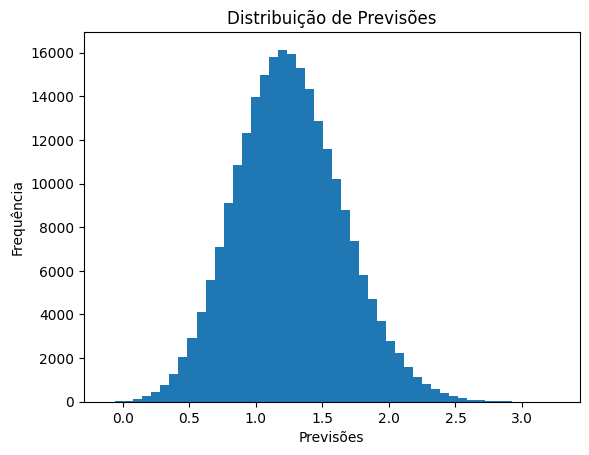

In [15]:
R_pred_test_selected_np = test_pred_select_nmf.cpu().detach().numpy()
plt.hist(R_pred_test_selected_np.flatten(), bins=50)
plt.xlabel('Previsões')
plt.ylabel('Frequência')
plt.title('Distribuição de Previsões')
plt.show()

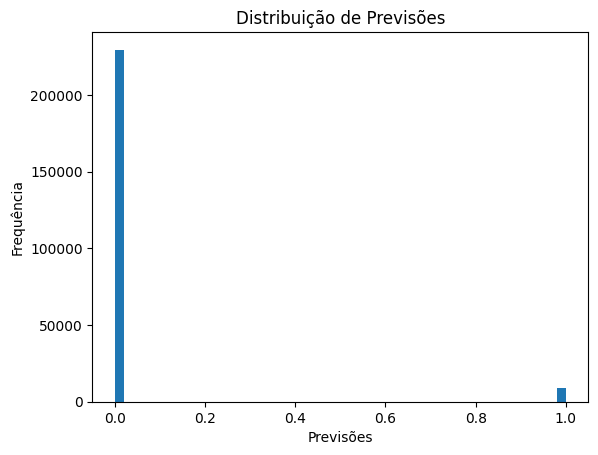

In [16]:
plt.hist(predicted_classes_nmf.flatten(), bins=50)
plt.xlabel('Previsões')
plt.ylabel('Frequência')
plt.title('Distribuição de Previsões')
plt.show()

# *SVD*


In [17]:
def svd(train, val, num_epochs, n_components,learning_rate):
    num_users = train.shape[0]
    num_items = train.shape[1]

    # Inicializar matrizes de fatorização aleatórias
    U = torch.rand(num_users, n_components, requires_grad=True)
    S = torch.rand(n_components, requires_grad=True)
    V = torch.rand(n_components, num_items, requires_grad=True)

    loss_func = torch.nn.MSELoss()
    optimizer = torch.optim.SGD([U, S, V], lr=learning_rate, momentum=0.9)

    best_val_loss = float('inf')
    best_U = None
    best_S = None
    best_V = None

    for epoch in tqdm(range(num_epochs), "Epoca SVD: "):
        # Forward pass
        R_pred = torch.matmul(torch.matmul(U, torch.diag(S)), V)

        R_pred_train = R_pred[:train.shape[0], :train.shape[1]]
        R_pred_val = R_pred[:val.shape[0], :val.shape[1]]

        train_loss = loss_func(R_pred_train, train)
        val_loss = loss_func(R_pred_val, val)

        # Backward pass and optimization
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_U = U.clone().detach()
            best_S = S.clone().detach()
            best_V = V.clone().detach()

    return best_U, best_S, best_V

In [18]:
U, S, V = svd(train_tensor, val_tensor, num_epochs, n_components ,learning_rate)

Epoca SVD: 100%|██████████| 10000/10000 [00:41<00:00, 238.78it/s]


In [19]:
test_pred_svd = torch.mm(torch.mm(U, torch.diag(S)), V)
test_pred_select_svd = test_pred_svd[:test_tensor.shape[0], :test_tensor.shape[1]]
test_mse_svd = mean_squared_error(test_tensor, test_pred_select_svd.detach().numpy())

print(f'MSE for NMF on test set: {test_mse_svd}')

MSE for NMF on test set: 0.7886487245559692


In [20]:
threshold_value = 2
predicted_classes = (test_pred_select_nmf > threshold_value).float()
true_classes = (test_data > threshold_value).astype(float)

# Calculando métricas de avaliação
accuracy_nmf = accuracy_score(true_classes.ravel(), predicted_classes.ravel())
precision_nmf = precision_score(true_classes.ravel(), predicted_classes.ravel())
recall_nmf = recall_score(true_classes.ravel(), predicted_classes.ravel())
f1_nmf = f1_score(true_classes.ravel(), predicted_classes.ravel())

# Exibindo as métricas calculadas
print(f"Acurácia: {accuracy_nmf}")
print(f"Precisão: {precision_nmf}")
print(f"Recall: {recall_nmf}")
print(f"F1-score: {f1_nmf}")

Acurácia: 0.9164182478940229
Precisão: 0.07625930320353791
Recall: 0.058400792995208985
F1-score: 0.06614585769752537


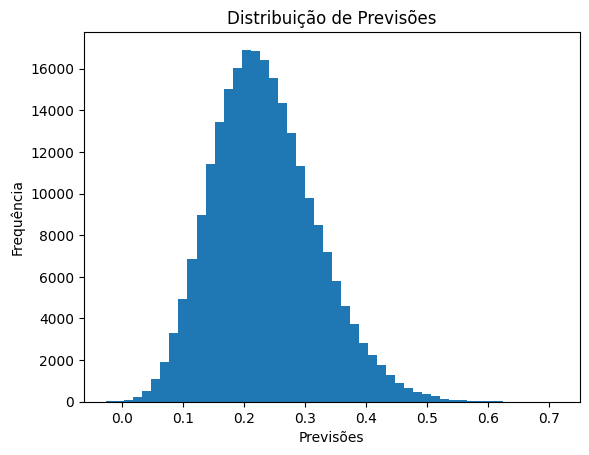

In [21]:
R_pred_test_selected_svd = test_pred_select_svd.cpu().detach().numpy()
plt.hist(R_pred_test_selected_svd.flatten(), bins=50)
plt.xlabel('Previsões')
plt.ylabel('Frequência')
plt.title('Distribuição de Previsões')
plt.show()

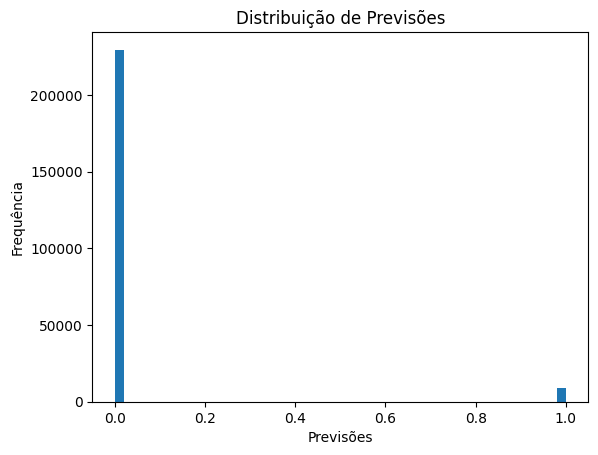

In [22]:
plt.hist(predicted_classes.flatten(), bins=50)
plt.xlabel('Previsões')
plt.ylabel('Frequência')
plt.title('Distribuição de Previsões')
plt.show()